In [28]:
import torch
from PIL import Image
from torchvision.transforms import v2
from module.model_builder.model import Model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoints = torch.load("checkpoints2/checkpoint_v2.pth.tar", map_location=device)
vocab = checkpoints['vocab']

# Create instance model
n_dim_model = 512
# --- Encoder Parameters ---
input_chanel_encoder = 3
hidden_dim_encoder = 512
n_head_encoder = 8
n_expansion_encoder = 4
n_layer_encoder = 6
# --- Decoder Parameters ---
n_head_decoder = 8
seq_length_decoder = 144
vocab_size_decoder = len(vocab)
n_expansion_decoder = 4
n_layer_decoder = 6
model = Model(n_dim_model, input_chanel_encoder, hidden_dim_encoder, n_head_encoder, n_expansion_encoder, n_layer_encoder,
              n_head_decoder, seq_length_decoder, vocab_size_decoder, n_expansion_decoder, n_layer_decoder).to(device)
model.load_state_dict(checkpoints['model_state_dict'])

<All keys matched successfully>

In [29]:
transform = v2.Compose([
    v2.PILToTensor(),
    v2.ToDtype(torch.float)
])

In [30]:
idx_start = vocab['<start>']
idx_end = vocab['<end>']

In [31]:
print(idx_start, idx_end)

1 2


In [32]:
import random

paths = []
true_labels = []
with open('dataset/train.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    temp = random.sample([i for i in range(len(lines))], 20)
    for idx in temp:
        line = lines[idx]
        line = line.rstrip()
        image_path, label = line.split('--------')
        paths.append(image_path)
        true_labels.append(label)

Image path: image_17110.png
Predicted text: 66/14/9 Cộng Lợi Phường 61 Tân Bình Tp Hồ Chí Minh
True text: 89 Thái Thị Kiểu Kp2 P6 Thị Xã Cai Lậy Tiền Giang


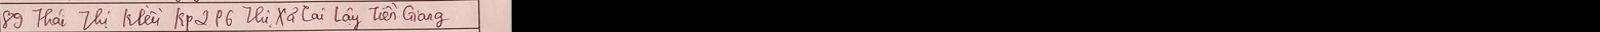

Image path: image_21149.png
Predicted text: tình trạng đơn bị chậm xử
True text: tình trạng đơn bị chậm xử


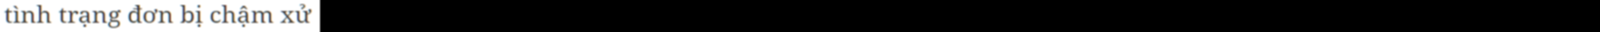

Image path: image_4849.png
Predicted text: 4.2. Xây dựng mô hình
True text: 4.2. Xây dựng mô hình


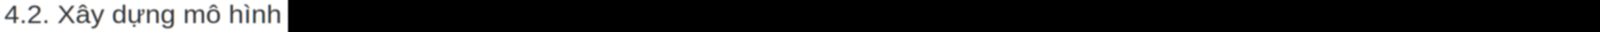

Image path: image_2545.png
Predicted text: 4. KẾT LUẬN VÀ HƯỚNG PHÁT TRIỂN
True text: 4. KẾT LUẬN VÀ HƯỚNG PHÁT TRIỂN


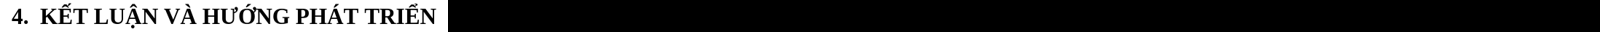

Image path: image_1846.png
Predicted text: Ngoài ra, chế độ xã hội
True text: nào nhằm mục đích tình dục.


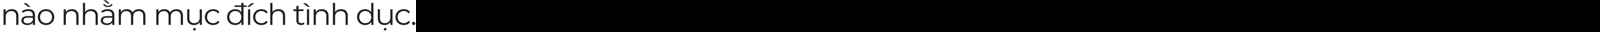

Image path: image_13266.png
Predicted text: Thôn Lâm Lộc 3 Hoà Minh Tuy Phong Bình Thuận
True text: Phường Vị Thành Phố Vị Thanh Hậu Giang


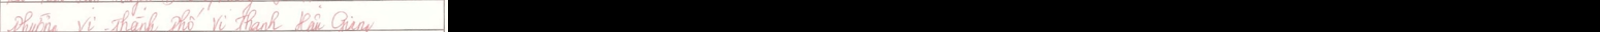

Image path: image_16997.png
Predicted text: Thôn Hữu Định Quang Minh Hiệp Hoà Bắc Giang
True text: Tường Thắng B Vĩnh Thanh Phước Long Bạc Liêu


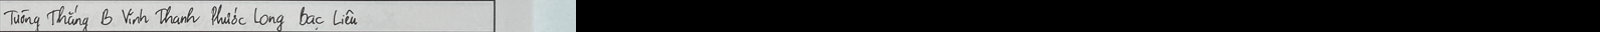

Image path: image_14051.png
Predicted text: Thôn Lâm Lộc 3 Hoà Minh Tuy Phong Bình Thuận
True text: 544/1 Phú Lợi Tổ84 Kp9 Phú8ợi Thủ Dầu Một Bình Dương


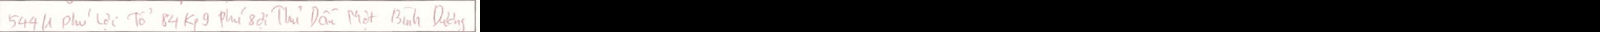

Image path: image_23839.png
Predicted text: https://www.youtube.com/watch?v=D6yndJ lk14
True text: học Luật Thành phố Hồ Chí Minh


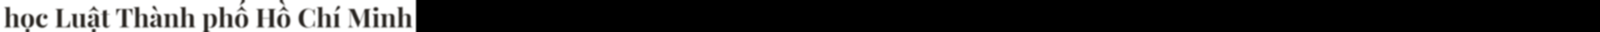

Image path: image_14959.png
Predicted text: Khu Phố 2 M8i Nẻ Tp Phan Thiết Bình Thuận
True text: Bà Giam A Đôn Xuân Duyên Hải Trà Vinh


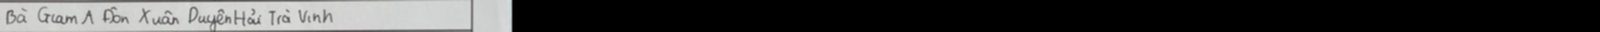

Image path: image_12913.png
Predicted text: Hải Hưng Hải Hậu Nam Định
True text: Nam Phong Phú Xuyên Hà Nội


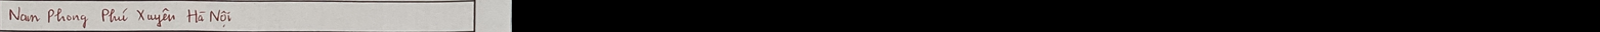

Image path: image_23560.png
Predicted text: sở giáo dục đại học đến từ 96 quốc gia trên thế giới.
True text: sẽ công bố sớm chỉ tiêu cho những trường được ấn định chỉ


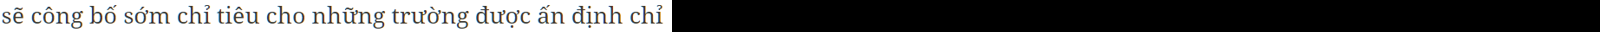

Image path: image_11606.png
Predicted text: Thôn Lạc Sơn Lạc Sơn Lâm Đơn Lâm Đồng
True text: Kp Sơn Tiến Tt Sóc Sơn Hòn Đất Kiên Giang


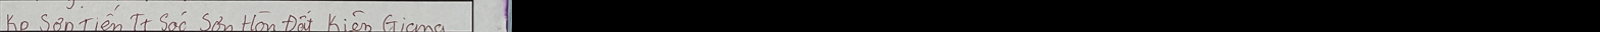

Image path: image_11468.png
Predicted text: Thôn Hải Phúc 4 Hoằng Thắng Hoằng Hoá Thanh Hoá
True text: Thôn 32 Ea Khăl Ea H'leo Đắk Lắk


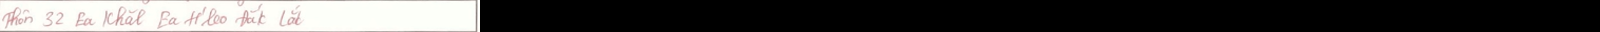

Image path: image_18630.png
Predicted text: Thôn Lâm Lộc 3 Hoà Minh Tuy Phong Bình Thuận
True text: Thôn Bưởi Rỏi Quảng Hợp Quảng Trạch Quảng Bình


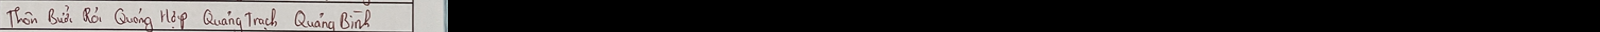

Image path: image_19581.png
Predicted text: Ấp 5 Tân Tây Gò Công Đông Tiền Giang
True text: Cao Thắng Thanh Miện Hải Dương


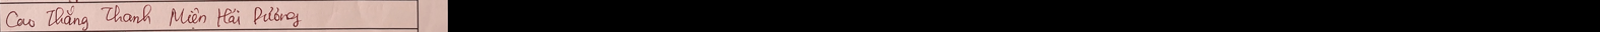

Image path: image_22937.png
Predicted text: Hình Bộ Làm Công Thủ Tục
True text: đại học Sư phạm Hà Nội.


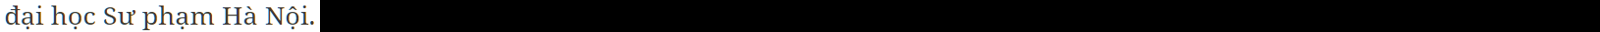

Image path: image_20874.png
Predicted text: có hiệu lực ngày 1/1/2023
True text: có hiệu lực ngày 1/1/2023


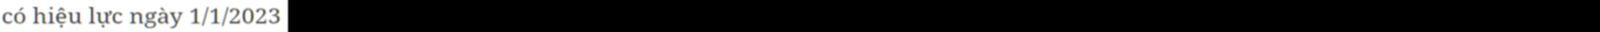

Image path: image_2394.png
Predicted text: Đối với người thuê xe:
True text: Đối với người thuê xe:


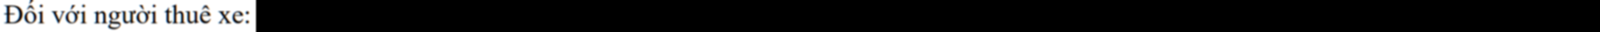

Image path: image_9840.png
Predicted text: trung bình đồ dài của đài hoa tăng dần từ setosa,
True text: Thẩm phu nhân cầm lấy một thanh chạm rỗng làm thành


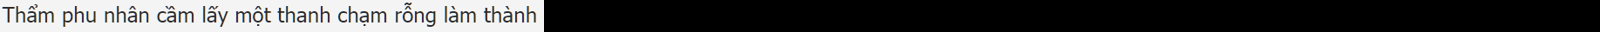

Image path: image_20104.png
Predicted text: Này đó quần áo ta đều cấp an tiểu thư bao
True text: kiện phát triển kinh tế số, xã hội số, khoa


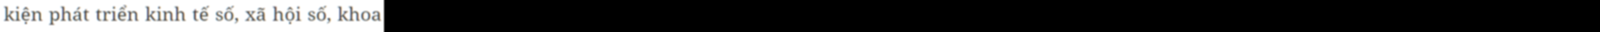

Image path: image_14958.png
Predicted text: Khu Phố 2 M8i Nẻ Tp Phan Thiết Bình Thuận
True text: Bà Giam A Đôn Xuân Duyên Hải Trà Vinh


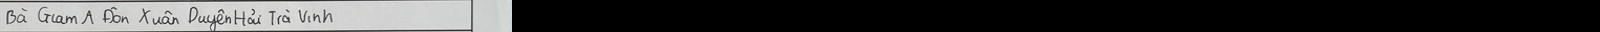

Image path: image_14520.png
Predicted text: Thôn Đông Dinh Diên Toàn Diên Khánh Khánh Hoà
True text: Tdp 1 Tân Hoà Buôn Ma Thuột Đắk Lắk


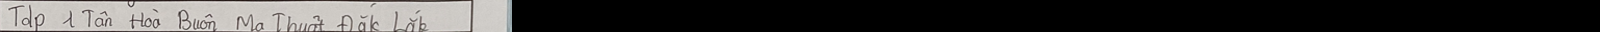

Image path: image_5601.png
Predicted text: hyperparameter that we fit using validation data:
True text: hyperparameter that we fit using validation data:


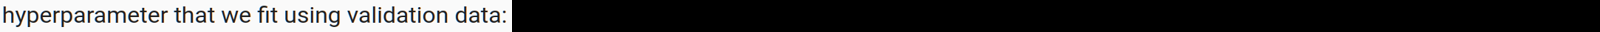

Image path: image_13745.png
Predicted text: Thôn Tân Phú Vạn Phú Vạn Ninh Khánh Hoà
True text: 47 Điện Biên Phủ Phường 72 Bình Thạnh Tp Hồ Chí Minh


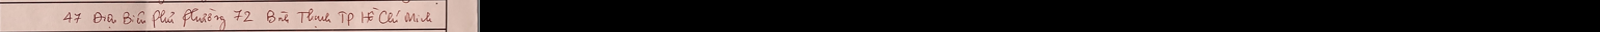

Image path: image_5367.png
Predicted text: + Năm 1941, trở về nước, lãnh đạo phong trào CM trong nước
True text: + Học ở trường Quốc học Huế rồi dạy học ở Dục Thanh (Phan


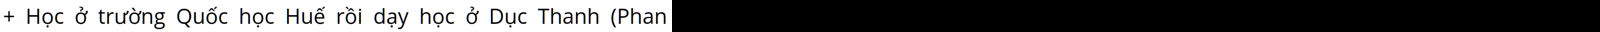

Image path: image_6570.png
Predicted text: hỗ trợ mang thiết bị y tế trị giá bảng anh cho việt nam
True text: hỗ trợ mang thiết bị y tế trị giá bảng anh cho việt nam


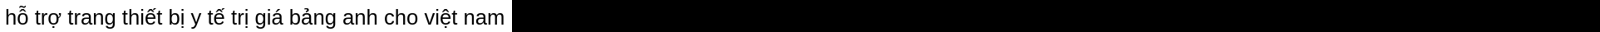

Image path: image_6173.png
Predicted text: 2. Positional Encoding
True text: 2. Positional Encoding


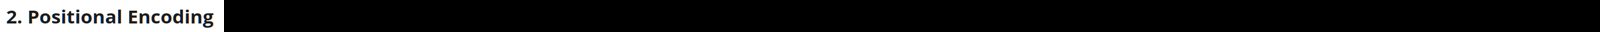

Image path: image_17358.png
Predicted text: Tổ 6 Khu Phố 6 Phước Trung Tp Bà Rịa Bà Rịa Vũng Tàu
True text: Tổ 56 Nam Hồ Phường 83 Thành Phố Đà Lạt Lâm Đồng


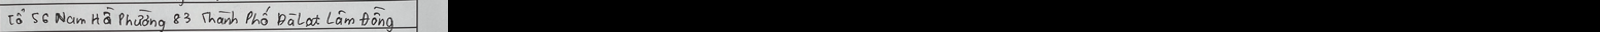

Image path: image_8538.png
Predicted text: liền nếm một miệng trà canh,
True text: liền nếm một miệng trà canh,


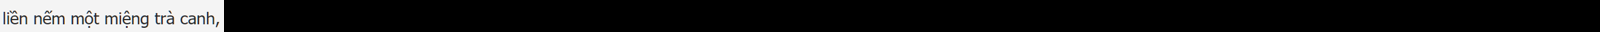

Image path: image_13228.png
Predicted text: Thôn Khuôn D4u Tân Thành Hữu Lũng Lạng Sơn
True text: Ấp Tích Khánh Tích Thiện Trà Ôn Vĩnh


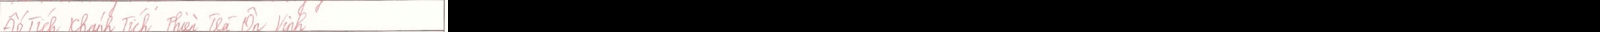

Image path: image_8260.png
Predicted text: hàng hóa, liền nghe được bên ngoài tiếng người ồn ào, biết Trịnh đại lão gia lại đây.
True text: hàng hóa, liền nghe được bên ngoài tiếng người ồn ào, biết Trịnh đại lão gia lại đây.


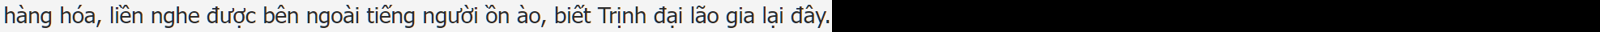

Image path: image_5296.png
Predicted text: vì một việt nam khỏe mạnh và bền vững
True text: vì một việt nam khỏe mạnh và bền vững


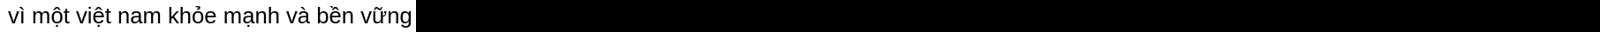

Image path: image_6386.png
Predicted text: TRONG TƯƠNG LAI,
True text: TRONG TƯƠNG LAI,


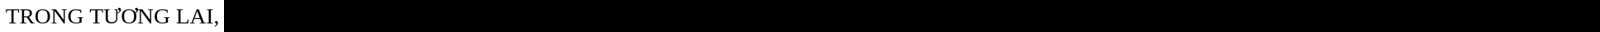

Image path: image_11417.png
Predicted text: Thôn Khuôn D4u Tân Thành Hữu Lũng Lạng Sơn
True text: Nam Thanh Tiền Hải Thái Bình


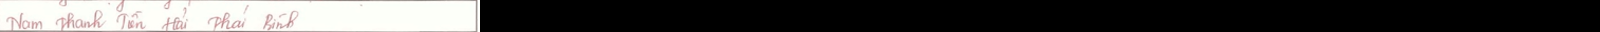

Image path: image_15632.png
Predicted text: Thôn 4 Cư Prao Mdrắk Đắk Lắk
True text: Đồng Dầu Dục Tú Đông Anh Hà Nội


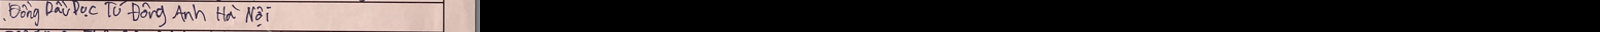

Image path: image_5118.png
Predicted text: 2.3. Swarn plot
True text: 2.1. Density plot


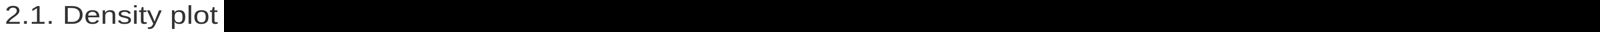

Image path: image_7477.png
Predicted text: nói một lần, sau đó sử điểm tiền tài chiếu cố hạ trong nhà lao người hoặc là tìm đều lang trung phán phạt thời điểm hạ
True text: nói một lần, sau đó sử điểm tiền tài chiếu cố hạ trong nhà lao người hoặc là tìm đều lang trung phán phạt thời điểm hạ


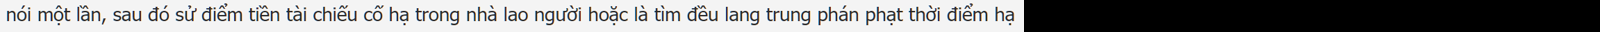

Image path: image_13749.png
Predicted text: Thôn Tân Phú Vạn Phú Vạn Ninh Khánh Hoà
True text: 47 Điện Biên Phủ Phường 72 Bình Thạnh Tp Hồ Chí Minh


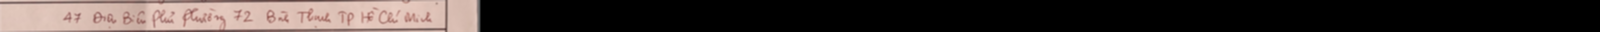

Image path: image_23959.png
Predicted text: Tiếp sĩ Trần Việt Dũng, thông qua ngày hội, nhà trường sẽ
True text: Tiến sĩ Trần Việt Dũng, thông qua ngày hội, nhà trường sẽ


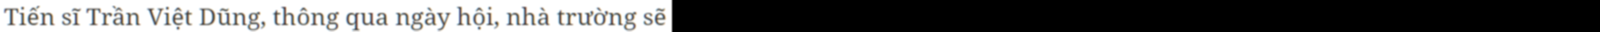

Image path: image_10829.png
Predicted text: Thôn Tân Phú 1 Đinh Lạc Di Linh Lâm Đồng
True text: 36c Ma Xuân Thường Phường 31 Quận 6 Tp Hcm


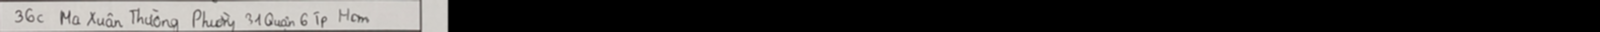

Image path: image_21937.png
Predicted text: Có nhiều lựa đượ trọng thế này nhưng người không thêm nhai
True text: Có nhiều lựa chọn trong đời sống nhưng nếu cho Hùng chọn,


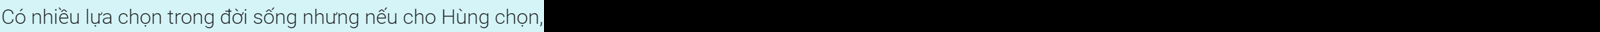

Image path: image_21420.png
Predicted text: Phim cũng chứa đầy chất nhân văn ít có ở thời đó.
True text: Phim cũng chứa đầy chất nhân văn ít có ở thời đó.


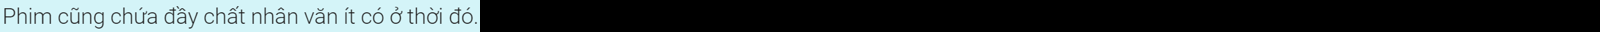

Image path: image_15941.png
Predicted text: Ấp Lợi Nhơn Mỹ Lợi A Cái Bè Tiền Giang
True text: Ấp Lợi Nhơn Mỹ Lợi A Cái Bè Tiền Giang


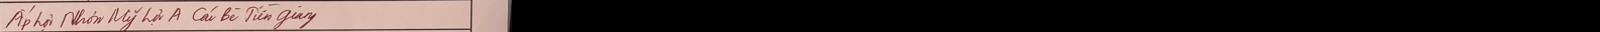

Image path: image_14823.png
Predicted text: Thôn Vàng Lè Chiêu Yên Yên Sơn Tuyên Quang
True text: Phan Rang Tháp Chàm Ninh Thuận


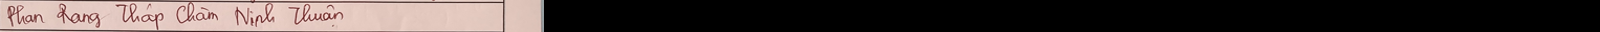

Image path: image_17747.png
Predicted text: Thôn Lạc Sơn Lạc Thuận Lương Sơn
True text: 361/4 Lương Thế Vinh Mỹ Long Long Xuyên An Giang


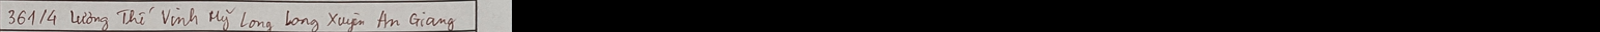

Image path: image_19859.png
Predicted text: Tổ 68 Đông Bình Hoà An Thành Phố Cao Lãnh Đồng Tháp
True text: Vĩnh Phú Mạo Khê Thị Xã Đông Triều Quảng Ninh


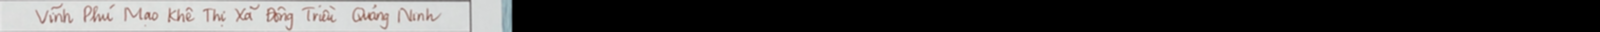

Image path: image_3225.png
Predicted text: hơn nghìn tỷ đồng được huy động va quỹ vaccine phòng covid
True text: bảo đảm cung ứng đủ thuốc điều trị bệnh nhân sốt xuất huyết nặng


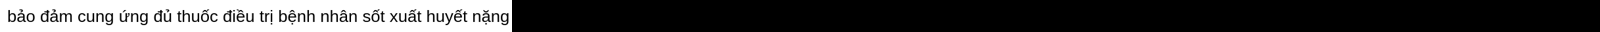

Image path: image_23263.png
Predicted text: Thư viện cũng biết ta tình huống, mặt nghèo khổ học sinh cũng các có chính
True text: Trong khi nhiều trường công lập cơ bản giữ ổn định chỉ tiêu tuyển sinh thì một số


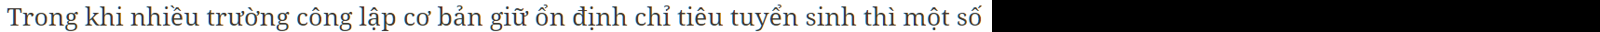

Image path: image_21767.png
Predicted text: Mỗi phim là một tác phẩm duy nhất.
True text: Mỗi phim là một tác phẩm duy nhất.


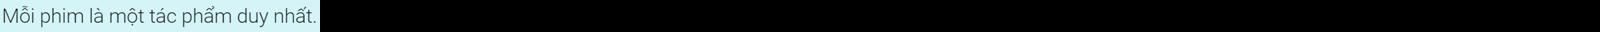

Image path: image_5693.png
Predicted text: Plot training and test accuracy:
True text: Dự báo và kiểm định trên tập test


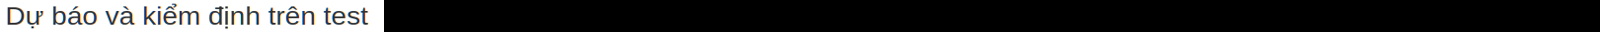

Image path: image_8667.png
Predicted text: "Không nghĩ tới ngươi nghĩ vậy một bước.
True text: "Không nghĩ tới ngươi nghĩ vậy một bước.


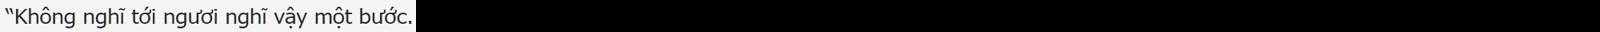

Image path: image_3781.png
Predicted text: 6. Mặt nạ (Mask) và các điểm pixels
True text: First, we generate some data as before


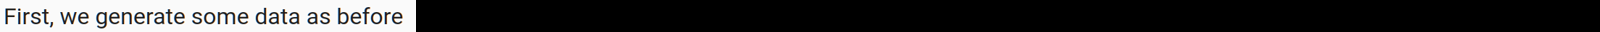

Image path: image_1497.png
Predicted text: Kiểm tra ví dụ bên dưới,
True text: Do đó việc sử dụng


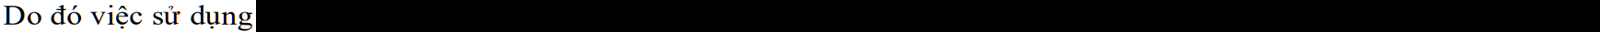

Image path: image_1114.png
Predicted text: HÌNH 2. WEB FRAMEWORK PHỔ BIẾN NHẤT THẾ GIỚI THEO KHẢO SÁT
True text: độ (chrominance) trong không gian màu CIELAB tương ứng.


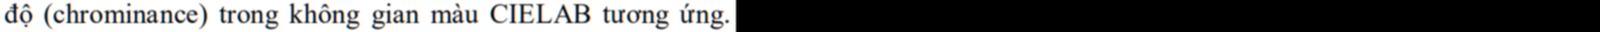

Image path: image_15116.png
Predicted text: Tổ 6 Khu Phố 6 Phước Trung Tp Bà Rịa Bà Rịa Vũng Tàu
True text: Xóm Yên Lịch Thanh Sơn Lương Sơn Hoà Bình


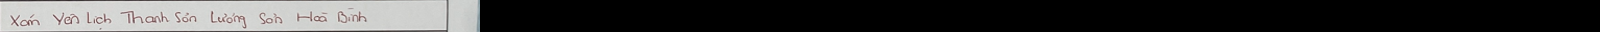

Image path: image_8601.png
Predicted text: Thẩm gia một chút sự tình, ta nghĩ kia có lẽ là ngài phía dưới cửa hàng."
True text: Thẩm phu nhân vừa thấy, này trên giấy họa chính là dù sao ô vuông, bên trái là cửa


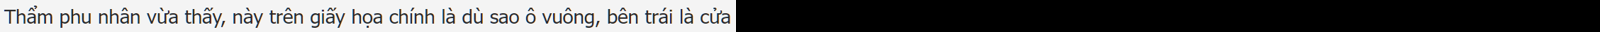

Image path: image_7811.png
Predicted text: mặt khác thị vệ đều không để ý tới nàng, có đôi khi còn xua đặt cửa hàng báo
True text: mua hai mạ vàng bạc hoa, nói là trở về phao nước uống, sau đó liền ở cửa


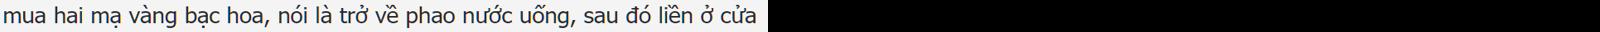

Image path: image_1632.png
Predicted text: đến gặp một tổ chức phi chính phủ,
True text: đến gặp một tổ chức phi chính phủ,


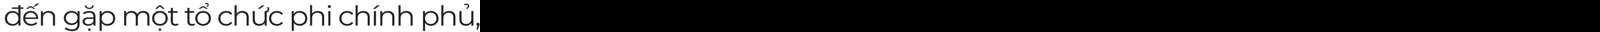

Image path: image_14099.png
Predicted text: Thôn Hữu Định Quang Minh Hiệp Hoà Bắc Giang
True text: Xóm Đồng Tâm Yên Trị Yên Thuỷ Hoà Bình


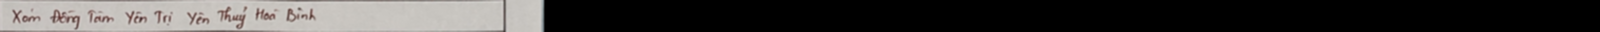

Image path: image_12227.png
Predicted text: Thôn Lạc Sơn Lạc Sơn Lâm Đơn Lâm Đồng
True text: 883 Tổ 42a Phương Liệt Thanh Xuân Hà Nội


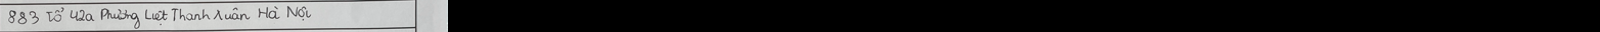

Image path: image_22242.png
Predicted text: đến chuyên ngành được qua trọng thông
True text: tình yêu tuyệt đẹp thì anh chọn cái nào?


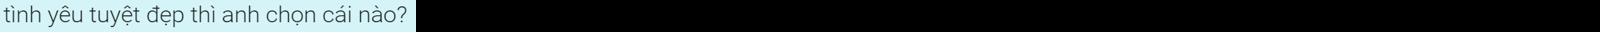

Image path: image_7037.png
Predicted text: Thẩm phu nhân nghiêm mặt nói:
True text: Chung thêm phúc thấp giọng nói:


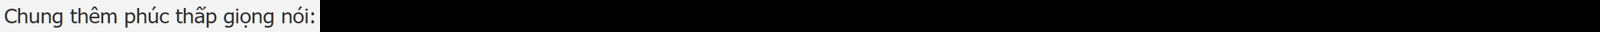

Image path: image_17176.png
Predicted text: Thôn An Lạc Yên Khánh Ý Yên Nam Định
True text: Phước Sơn Tuy Phước Bình Định


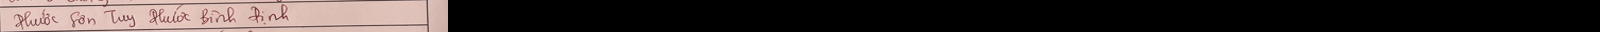

Image path: image_22999.png
Predicted text: làm chiếm gần 92%, năm 2023 chiếm khoảng
True text: Em hy vọng có thể tìm kiếm được công việc


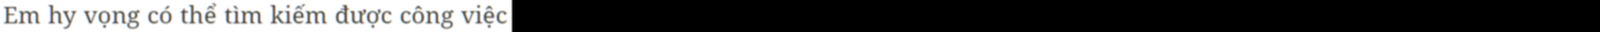

Image path: image_3732.png
Predicted text: In practice, we the thibeweding tix ffff tre
True text: In practice, we characterize this tradeoff via


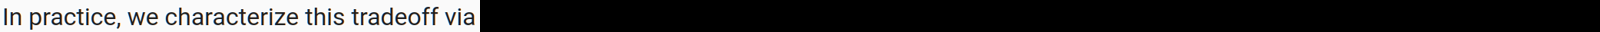

Image path: image_18311.png
Predicted text: Hậu Thành Yên Thành Nghệ An
True text: Mộc Châu Sơn La


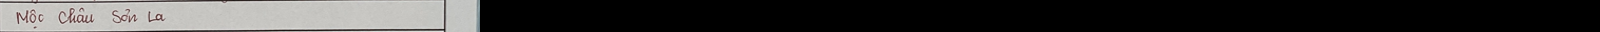

Image path: image_7793.png
Predicted text: này vẫn là Hồ Châu phủ Doãn đại nhân cho nàng phổ cập khoa học.
True text: nơi này nửa con phố là Trà Phô tử, nữa con phố là tiệm thuốc, Hồ Châu


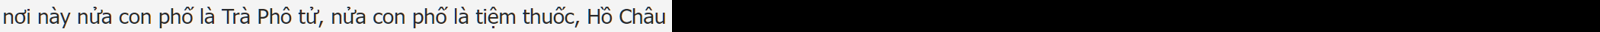

Image path: image_3593.png
Predicted text: ta ngày mai không đáng giá cương, hồi Hình Bộ làm việc."
True text: hình baseline, chỉ số auc và f1 score đều tăng.


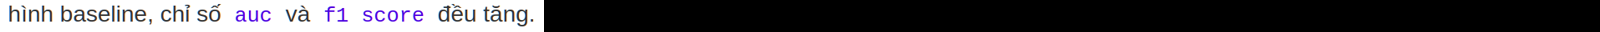

Image path: image_2689.png
Predicted text: Công bố mẫu phiếu đăng ký dự tuyển lớp 10 công lâp của Hà Nội
True text: vì sao cần can thiệp sớm chậm tăng trưởng do thiếu gh ở trẻ


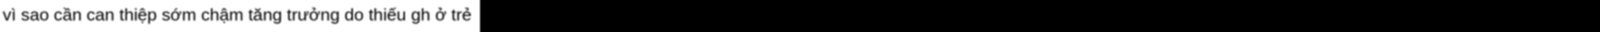

Image path: image_18123.png
Predicted text: Hoà Bình Văn Quan Lạng Sơn
True text: Huyện Chí Linh Hải Dương


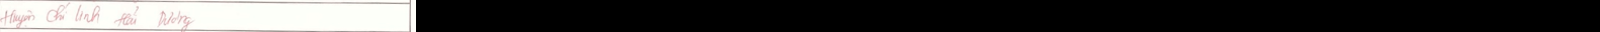

Image path: image_2080.png
Predicted text: Stage 2: Huấn luyện với 1 lượng dữ liệu nhỏ hơn về chữ viết tay + chữ đánh
True text: Stage 2: Huấn luyện với 1 lượng dữ liệu nhỏ hơn về chữ viết tay + chữ đánh


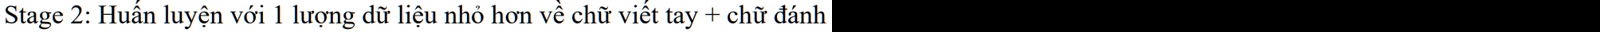

Image path: image_12367.png
Predicted text: Phường 4 Thành Phố Sa Đéc Đồng Tháp
True text: Mai Động Hương Mạc Thị Xã Từ Sơn Bắc Ninh


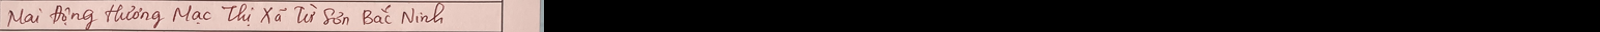

Image path: image_15479.png
Predicted text: Thôn Đông Dinh Diên Toàn Diên Khánh Khánh Hoà
True text: 87/7/63 Đường 27 Hiệp Bình Chánh Tp Thủ Đức Hồ Chí Minh


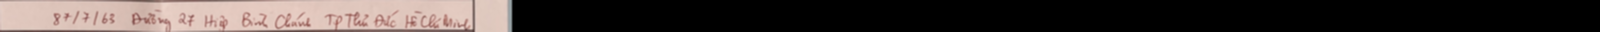

Image path: image_24236.png
Predicted text: Theo dõi các bệnh nhân bị ngứa chưa rõ nguyên nhân ở Thanh Hóa
True text: Theo dõi các bệnh nhân bị ngứa chưa rõ nguyên nhân ở Thanh Hóa


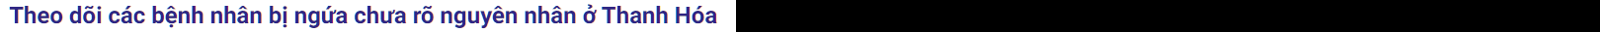

Image path: image_18407.png
Predicted text: Ngòi A Văn Yên Yên Bái
True text: Lê Lợi Chí Linh Hải Dương


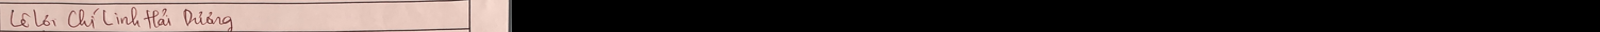

Image path: image_4625.png
Predicted text: astrazeneca và bệnh viện chợ rẫy hợp tác đẩy mạnh các nghiên cứu khoa học
True text: astrazeneca và bệnh viện chợ rẫy hợp tác đẩy mạnh các nghiên cứu khoa học


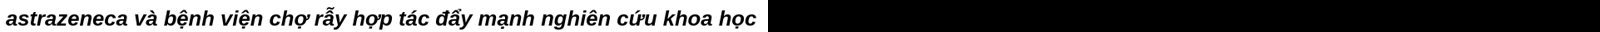

Image path: image_23761.png
Predicted text: nơi kết nối các nhà giáo dục tiên phong
True text: nơi kết nối các nhà giáo dục tiên phong trong


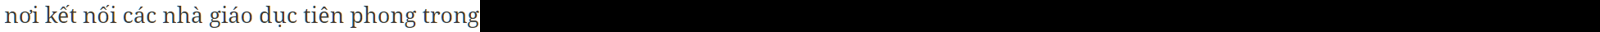

Image path: image_16856.png
Predicted text: Ấp 4 Tân Hiệp Long Thành Đồng Nai
True text: Thôn Văn Quan Duyên Hải Hưng Hà Thái Bình


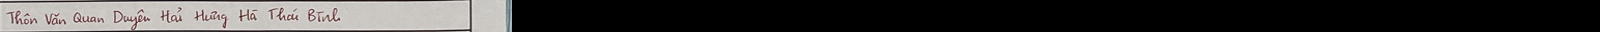

Image path: image_18866.png
Predicted text: Thôn Đình Tổ Nguyễn Trãi Thường Tín Hà Nội
True text: Lương Hoà A Châu Thành Trà Vinh


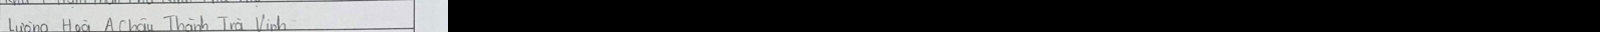

Image path: image_18673.png
Predicted text: Thôn Đồng Thanh Tân Bình Thành Phố Thái Bình Thái Bình
True text: 17a Ngô Từ Lam Sơn Thành Phố Thanh Hoá Thanh Hoá


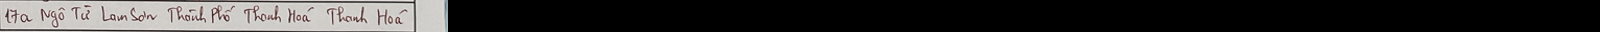

Image path: image_13391.png
Predicted text: Thôn Đồng Trấn 1 Diên Đồng Diên Khánh Khánh Hoà
True text: Kp Hiệp Đồng Định Quán Định Quán Đồng Nai


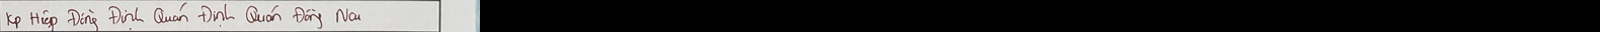

Image path: image_14054.png
Predicted text: Thôn Lâm Lộc 3 Hoà Minh Tuy Phong Bình Thuận
True text: 544/1 Phú Lợi Tổ84 Kp9 Phú8ợi Thủ Dầu Một Bình Dương


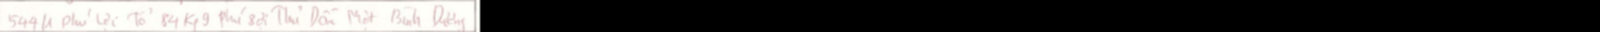

Image path: image_23389.png
Predicted text: chúng ta Trà Hành huynh đệ tự nhiên sẽ đi:
True text: tuyển sinh năm 2024 là 2.320, tăng hơn 50% so


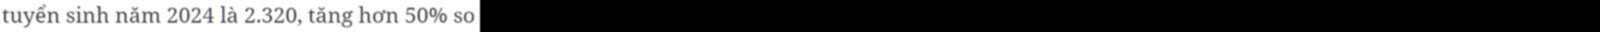

Image path: image_13576.png
Predicted text: Thôn Lạc Sơn Lạc Sơn Lâm Đơn Lâm Đồng
True text: Tổ 3 Phú An An Lộc Thị Xã Bình Long Bình Phước


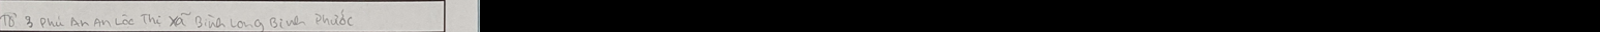

Image path: image_24678.png
Predicted text: Abdel-Fattah El-Sisi
True text: Abdel-Fattah El-Sisi


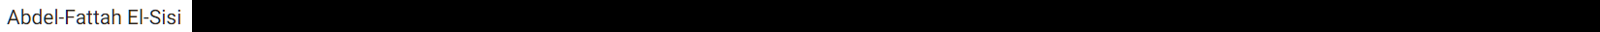

Image path: image_4516.png
Predicted text: DECODER BLOCK VỚI CÁC ẢNH TRẮNG ĐEN ĐẦU VÀO
True text: TIẾP TỤC NGHIÊN CỨU VÀ PHÁT TRIỂN THÊM CÁC MÔ HÌNH


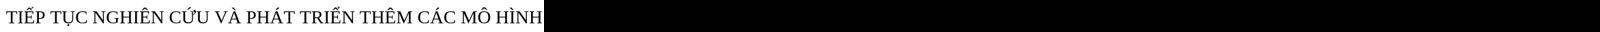

Image path: image_5624.png
Predicted text: 4.5.6. Exercises
True text: 4.5.6. Exercises


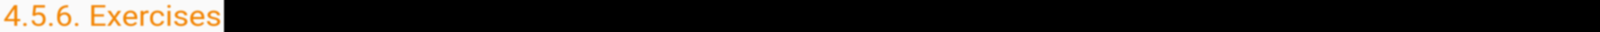

Image path: image_2519.png
Predicted text: đại bộ phận đều là dùng
True text: đầu tiên là hình ảnh gốc,


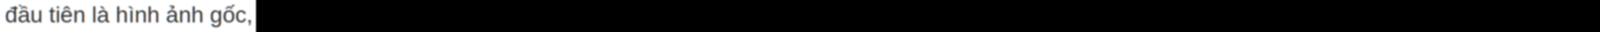

Image path: image_17425.png
Predicted text: Thôn Lâm Xá 5 Hồng Thái Tây Đông Triều Quảng Ninh
True text: 11 Văn Tiến Dũng Trần Quang Diệu Tp Quy Nhơn Bình Định


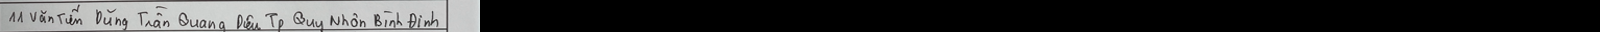

Image path: image_10858.png
Predicted text: Hoà Mỹ Tây Tây Hoà Phú Yên
True text: Phường 53 Quận 5 Hồ Chí Minh


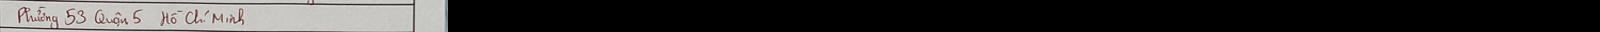

Image path: image_5944.png
Predicted text: bé trai mắc khối u quái ở hốc mắt
True text: bé trai mắc khối u quái ở hốc mắt


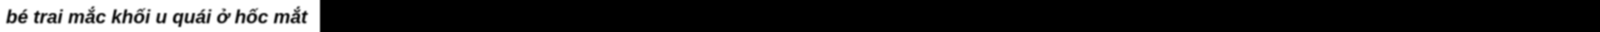

Image path: image_7766.png
Predicted text: Trà Hành kinh làm trốn không thoát can hệ,
True text: Trà Hành kinh làm trốn không thoát can hệ,


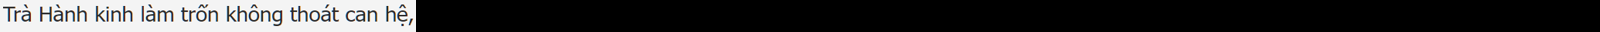

Image path: image_15581.png
Predicted text: Thôn Hữu Định Quang Minh Hiệp Hoà Bắc Giang
True text: Phường 82 Quận 6 Hồ Chí Minh


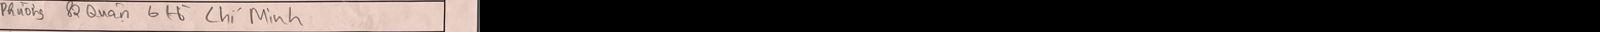

Image path: image_12795.png
Predicted text: Thôn Đừng Nhạp La Lốp Ea Súp Đắk Lắk
True text: Thị Trấn Nếnh Việt Yên Bắc Giang


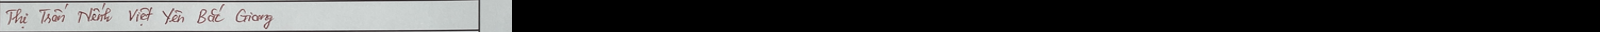

Image path: image_12035.png
Predicted text: Ấp Xóm Lớn B Vĩnh Mỹ A Hoà Bình Bạc Liêu
True text: Ấp 4 Hoà Thạnh Tam Bình Vĩnh Long


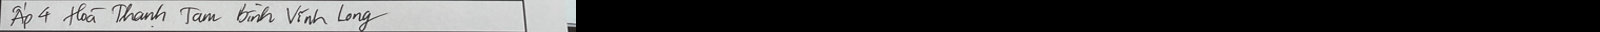

Image path: image_8872.png
Predicted text: "An đại cô nương, không phải ta không
True text: "Ban đầu ta nghe được này tin tức,


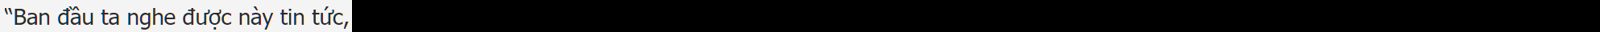

Image path: image_18989.png
Predicted text: Thôn Dân Chủ Đôn Nhân Sông Lông Vĩnh Phúc
True text: Phước Nam Thuận Nam Ninh Thuận


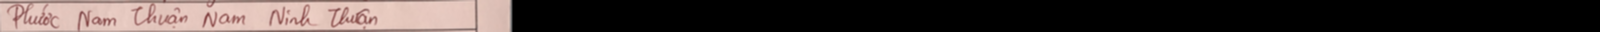

Image path: image_24927.png
Predicted text: tuổi trẻ liền phá vài cái đại án tử,
True text: để mang về bàn gỡ hòa cho Tottenham.


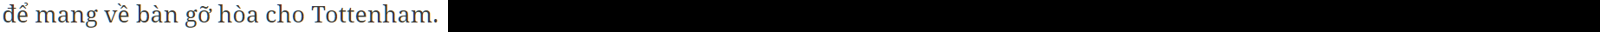

Image path: image_256.png
Predicted text: cuộc khảo sát thực hiện vào năm
True text: cửa và tìm thấy cô trong tình trạng nguy kịch.


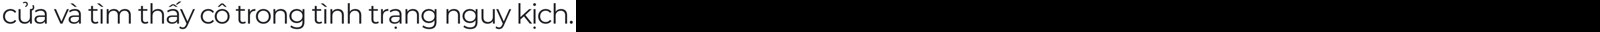

In [33]:
v = list(vocab.keys())
model.eval()
with torch.no_grad():
    for t, path in enumerate(paths):
        import os
        image_path = os.path.join('dataset/augment_data/', path) 
        labels = [idx_start]
        image = Image.open(image_path).convert("RGB")
        # Encoder
        input_encoder = transform(image)
        input_encoder = input_encoder.unsqueeze(0).to(device)
        for _ in range(seq_length_decoder):
            # Decoder
            input_decoder = torch.Tensor(labels).int()
            input_decoder = torch.unsqueeze(input_decoder, 0).to(device)
            output = model(input_encoder, input_decoder)
            idx = torch.argmax(output[:, -1, :])
            labels.append(idx.cpu().item())
            if idx.cpu().item() == idx_end:
                break
        print("Image path:", path)
        print("Predicted text:", ''.join([v[i] for i in labels[1:-1]]))
        print("True text:", true_labels[t])
        import IPython.display as ipd
        ipd.display(image)